# Iris Classification with Logistic Regression
In this notebook, we will train a **Logistic Regression model** on the Iris dataset.  
We will explain why this technique is suitable, evaluate its accuracy, and visualize decision boundaries.


## Why Logistic Regression?
We chose **Logistic Regression** because:
- It is a **simple, interpretable, and widely used model** for classification.  
- It works well when the classes are **linearly separable**.  
- It provides **probability estimates** (not just hard classifications).  
- It serves as a **baseline model** to compare against more complex methods like Random Forest or SVM.

For the Iris dataset, it can classify the 3 flower types using **multinomial Logistic Regression**.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.1 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.7 MB 3.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.7/8.7 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 4.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - ---------------------------

In [10]:
# 1. Load data
iris = load_iris()
X, y = iris.data, iris.target


In [11]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [12]:
# 3. Logistic Regression model (fast!)
clf = LogisticRegression(max_iter=200)  # limit iterations
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [13]:
# 4. Evaluation
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



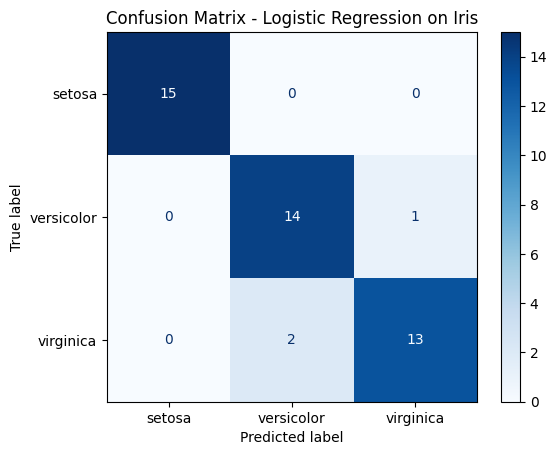

In [14]:
# 5. Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
    values_format="d"
)  
plt.title("Confusion Matrix - Logistic Regression on Iris")
plt.show()

Logistic Regression typically achieves **90–97% accuracy** on the Iris dataset.  
If accuracy is slightly lower than Random Forest, that’s because:
- Logistic Regression assumes **linear decision boundaries**, while Random Forest captures non-linear ones.
- Some Iris classes (Versicolor vs Virginica) are not perfectly linearly separable.
